## Title : Heart Disease Prediction

**Author : Talha Toqeer** [Github](https://github.com/Talha336?tab=repositories)

**Dataset : Heart Disease UCI** (https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)



## Meta-Data

**About Dataset**

**Context**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.


**Column Descriptions:**

1.id (Unique id for each patient)

2.age (Age of the patient in years)

3.origin (place of study)

4.sex (Male/Female)

5.cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

6.trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

7.chol (serum cholesterol in mg/dl)

8.fbs (if fasting blood sugar > 120 mg/dl)

9.restecg (resting electrocardiographic results)

-- Values: [normal, stt abnormality, lv hypertrophy]

10.thalach: maximum heart rate achieved

11.exang: exercise-induced angina (True/ False)

12.oldpeak: ST depression induced by exercise relative to rest

13.slope: the slope of the peak exercise ST segment

14.ca: number of major vessels (0-3) colored by fluoroscopy

15.thal: [normal; fixed defect; reversible defect]

16.num: the predicted attribute


 **Creators:**

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**Relevant Papers:**

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link

**Citation Request:**

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

**They would be:**

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objective

We will fill this after doing some (EDA) Exploratory Data Analysis


Let's start the project by importing all the libraries

In [1]:
# Import Libraries

# 1. To Handle the data
import pandas as pd
import numpy as np

# 2. To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3. To Preprocess the data
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer , KNNImputer


# Machine Learning Libraries
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV , cross_val_score

# For classification Task
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Metrics for the Classification Task
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')



### Load the Dataset


In [3]:
df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis(EDA)
Explore each column

In [4]:
# Exploring data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Data shape
df.shape

(920, 16)

In [6]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [7]:
# Age column
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

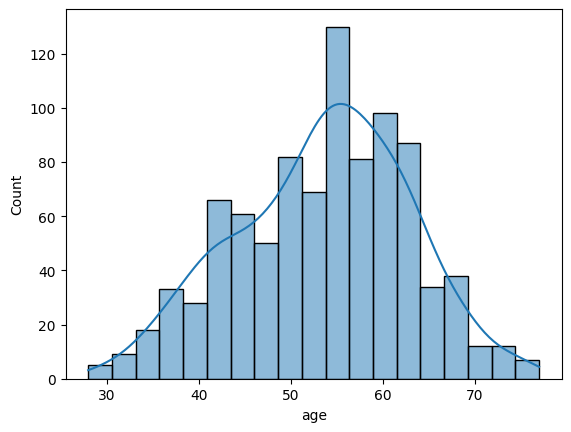

In [8]:
# draw histoplot to see distribution of age
sns.histplot(df['age'],kde=True)

In [9]:
print('Mean of Age :',df['age'].mean())
print('Median of Age :',df['age'].median())
print('Mode of Age :',df['age'].mode()[0])

Mean of Age : 53.51086956521739
Median of Age : 54.0
Mode of Age : 54


Lets Explore the Gender Based  distribution of dataset of age column using plotly

In [10]:
px.histogram(df,x='age',color='sex',barmode='group')


In [11]:
# Find value count on sex column
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [12]:
# Find the Percentage of gender having more heart disease and with less heart disease
df['sex'].value_counts(normalize=True)*100

,proportion
sex,
Male,78.913043
Female,21.086957


In [13]:
# Find the value count of age column by grouping the Sex column
df.groupby('sex')['age'].value_counts()


sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [14]:
# Let's deal with dataset column

df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [15]:
# Find unique values
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [16]:
# Group the data from dataset column to see how much value counts are males and females from those areas
df.groupby('dataset')['sex'].value_counts()

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64

In [17]:
# Count plot for the dataset column with gender value count
px.bar(df,x='dataset',color='sex')

In [18]:
# make a plot of age column using plotly and coloring by dataset column
px.histogram(df,x='age',color='dataset',barmode='group')

In [19]:
# Print mean median and mode of age column grouped by dataset column
print('Mean of Data set :',df.groupby('dataset')['age'].mean())
print('------------------------------------------------------')
print('Median of Data set :',df.groupby('dataset')['age'].median())
print('------------------------------------------------------')
print('Mode of Data set :',df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean of Data set : dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
------------------------------------------------------
Median of Data set : dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
------------------------------------------------------
Mode of Data set : dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


## Let's explore the Chest Pain (cp) column

In [20]:
# value count of cp column
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [21]:
# draw the plot of age column group by cp column
px.histogram(df,x='age',color='cp',barmode='group')

<Axes: xlabel='cp', ylabel='count'>

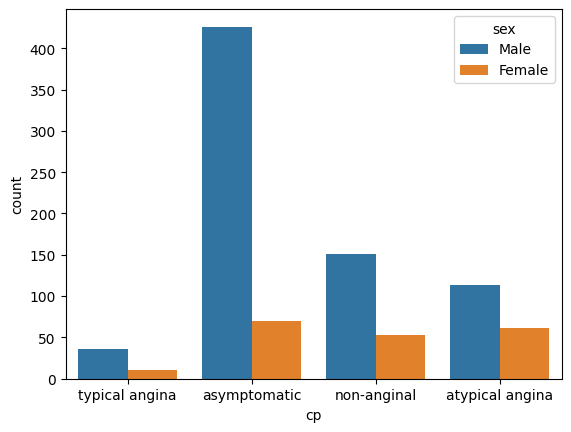

In [22]:
# Countplot of Cp column by sex column
sns.countplot(x='cp',hue='sex',data=df)

<Axes: xlabel='cp', ylabel='count'>

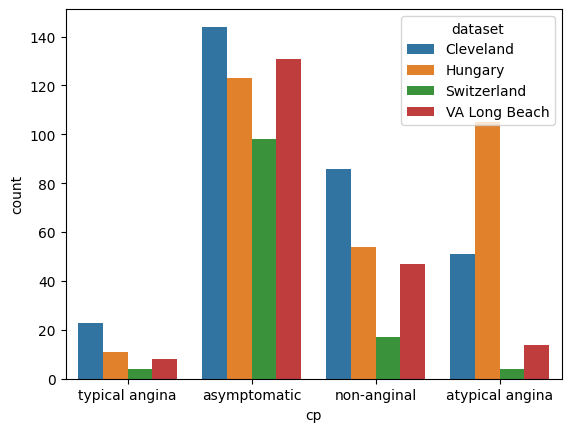

In [23]:
# Countplot of Cp column by dataset column
sns.countplot(x='cp',hue='dataset',data=df)

## Let's Explore the Trest blood pressure column (trestbps)

The normal resting blood pressure is 120/80 mm Hg

In [24]:
# Value counts Trestbps
df['trestbps'].value_counts()

,count
trestbps,
120.0,131
130.0,115
140.0,102
110.0,59
150.0,56
...,...
164.0,1
101.0,1
174.0,1


In [25]:
# Let's summarize the age column
df['trestbps'].describe().T

,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [26]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [27]:
# Imputing the Missing values of trestbps , chol , fbs, restecg , thalch , exang, oldpeak ,  slope , ca , thal
impute = SimpleImputer(strategy='median')
impute_cat = SimpleImputer(strategy='most_frequent')

df['trestbps'] = impute.fit_transform(df[['trestbps']])
df['chol'] = impute.fit_transform(df[['chol']])
df['fbs'] = impute.fit_transform(df[['fbs']])


In [28]:
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['ca'] = df['ca'].fillna(df['ca'].mean())
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [29]:
# All Missing values are imputed
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


## Dealing with Outliers in the dataset

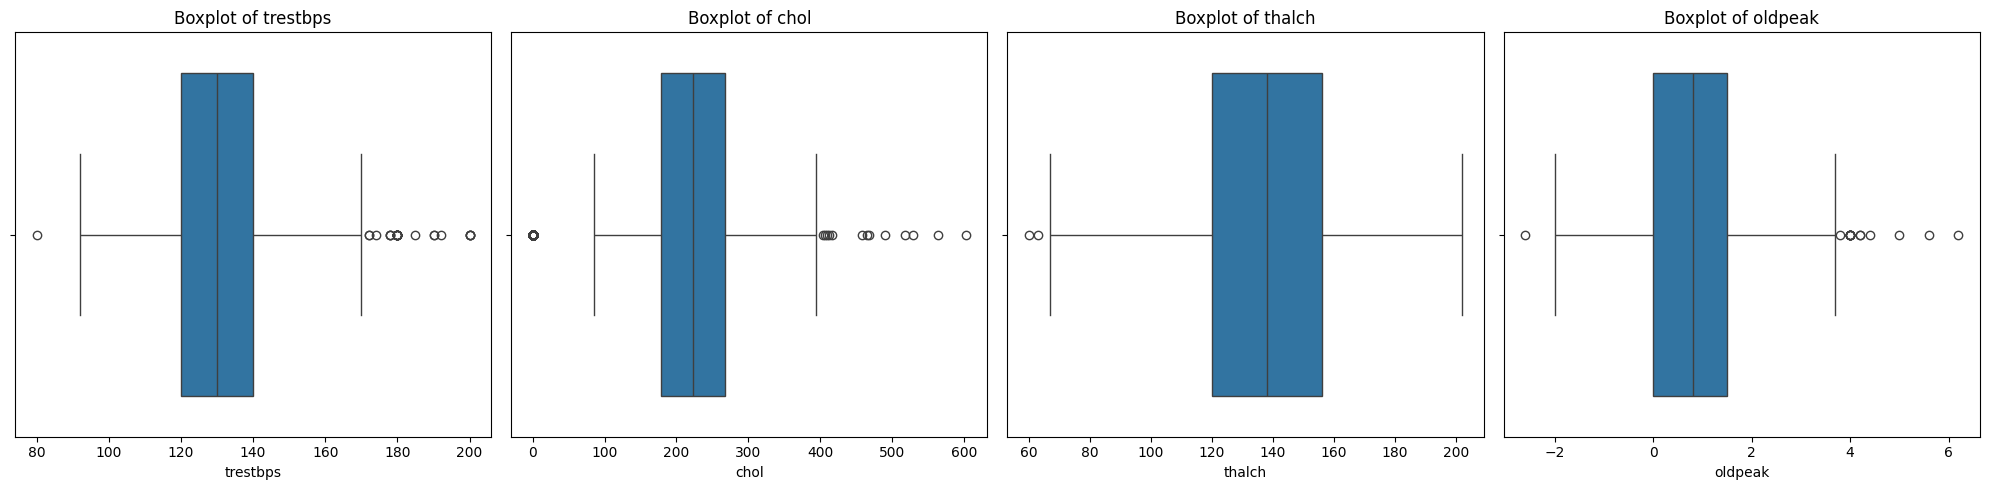

In [51]:
# List of columns to plot
columns_to_plot = ['trestbps', 'chol', 'thalch', 'oldpeak']


# Create subplots to display all boxplots together
fig, axes = plt.subplots(ncols=len(columns_to_plot), figsize=(20, 5))

# Loop through columns and plot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [49]:
# row where trestbps value is 0
df[df['trestbps'] == 0]

# remove this row from the data
df = df[df['trestbps'] != 0]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    float64
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    bool   
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: bool(1), float64(6), int64(3), object(6)
memory usage: 115.8+ KB


## Machine Learning

In [53]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [54]:
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,106
4,28


The Target column is Num (num) which is predicted attribute. We will use this column to predict the heart disease. The unique values in the column are [0,1,2,3,4] which states that there are 5 types of heart diseases.

0 = No heart disease

1 = Mild heart disease

2 = Moderate heart disease

3 = Severe heart disease

4 = Critical heart disease



In [55]:
# split the data into x and y
X = df.drop(columns=['num'])
y = df['num']

# Encode X data using seperate label encoder for all categorical columns and save it for inverse transform
for col in X.columns:
  if X[col].dtype == 'object' or X[col].dtype == 'category' :
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


# split the data into train test split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)


Enlist all the model for the prediction of heart disease these models will be classifier for multiclass classifcation

1. Logistic Regression
2. KNN
3. SVM
4. NB
5. Decision Tree
6. Random Forest
7. Xgboost
8. Catboost
9. Gradient Boost
10. Adaboost
11. lightgbm




In [57]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# import metrics
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [60]:
# create a function to train and evaluate all model and select the best one with tuned hyperparameters

# Models to be compared
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Pipeline and cross-validation for each model
best_model = None
best_score = 0
for name, model in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    # Train on training set
    pipeline.fit(X_train, y_train)

    # Test accuracy
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"Model: {name}")
    print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}\n")

    # Select the best model
    if test_accuracy > best_score:
        best_score = test_accuracy
        best_model = (name, pipeline)

# Output the best model
print(f"The best model is {best_model[0]} with a test accuracy of {best_score:.4f}.")


Model: Random Forest
Cross-validation Accuracy: 0.6381
Test Accuracy: 0.6522

Model: SVM
Cross-validation Accuracy: 0.5837
Test Accuracy: 0.5815

Model: Gradient Boosting
Cross-validation Accuracy: 0.6190
Test Accuracy: 0.6359

Model: Logistic Regression
Cross-validation Accuracy: 0.5211
Test Accuracy: 0.4891

Model: KNN
Cross-validation Accuracy: 0.5864
Test Accuracy: 0.5924

Model: Decision Tree
Cross-validation Accuracy: 0.5973
Test Accuracy: 0.6033

Model: XGBoost
Cross-validation Accuracy: 0.6163
Test Accuracy: 0.6359

Model: AdaBoost
Cross-validation Accuracy: 0.5782
Test Accuracy: 0.5435

Model: Naive Bayes
Cross-validation Accuracy: 0.5687
Test Accuracy: 0.5054

The best model is Random Forest with a test accuracy of 0.6522.


In [61]:
# Save the best model
import joblib
joblib.dump(best_model[1],'best_model.pkl')

['best_model.pkl']

### Outputs:
1. The Minimun age to have a heart disease is 28 years.
2. The Maximum age to have a heart disease is 77 years.
3. Most of the Males and Females get heart disease at the age of 54 - 55 Years.
4. Females have proportion of 21 % heart disease while males have proportion of 78 % heart disease
5. Males have more chances of getting heart disease based on the data
6. Cleveland have highest number of Patients (304) for heart disease and lowest from Switzerland (123)
7. The Highest Number of females in dataset are from Cleveland (97)
and Lowest from Valandbeach (6)
8. The Highest Number of males in the dataset are from Hungary (212) and Lowest from Switzerland (113)
9. Mean of Data set : dataset

   Cleveland        54.351974

   Hungary          47.894198

   Switzerland      55.317073

   VA Long Beach    59.350000

10. Median of Data set : dataset

    Cleveland        55.5

    Hungary          49.0

    Switzerland      56.0

    VA Long Beach    60.0

11. Mode of Data set : dataset

    Cleveland              58

    Hungary                54

    Switzerland            61

    VA Long Beach    [62, 63]

12. The Chest Pain Types are total 4  having its value counts each

    1. symptomatic (496)

    2. non-anginal (204)

    3. atypical angina (174)

    4. typical angina  (46)
  
